### Predict Cancellations

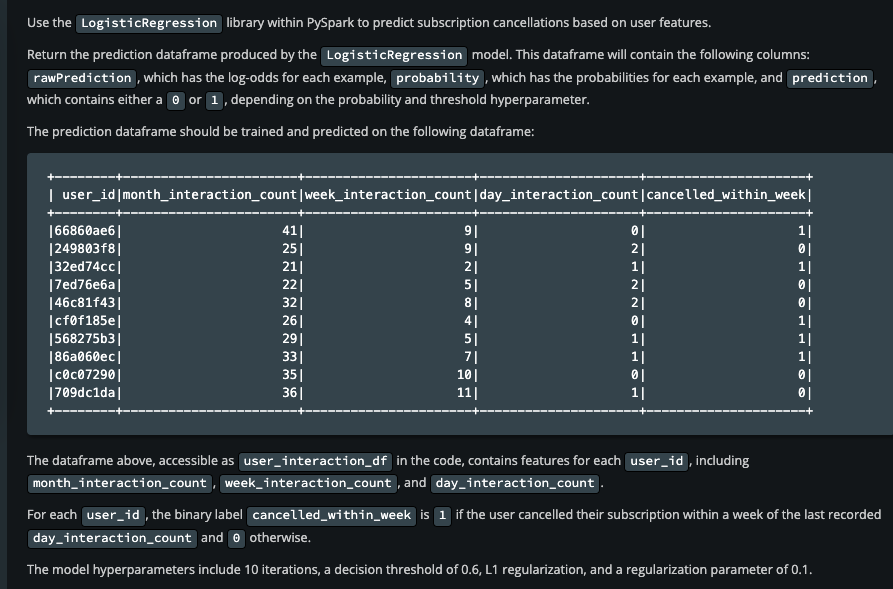


In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

def predict_cancellations(user_interaction_df):
    # Write your code here.
    """ 
    Pseudo Code -
    1. Hyperparameter -
        a. 10  (maxIter)
        b. Decision Threshold of 0.6 (threshold)
        c. L1 Regularization (elasticNetParam)
        d. Regularization of 0. (regParam)
    2. Creata a column for features
        a. Vector Assembler to combine month, week and day interactions
        counts into a single column features
    3. Create a column for the label
        a. Add column 'label' with the values copied from cancelled
        within a week
    4. Create the Model
    5. Generate the predictions dataframe -
        a. select the user_id, rawPredictions, probability, prediction
    """
    assembler = VectorAssembler(
        inputCols = ['month_interaction_count', 'week_interaction_count', 'day_interaction_count'],
        outputCol = 'features'
    )
    features_df = assembler.transform(user_interaction_df)
    features_df = features_df.withColumn('label', features_df['cancelled_within_week'])

    lr_model = LogisticRegression(maxIter=10, threshold=0.6, elasticNetParam=1, regParam=0.1)
    trained_lr_model = lr_model.fit(features_df)

    predictions_df = trained_lr_model.transform(features_df)
    predictions_df = predictions_df.select(['user_id', 'rawPrediction', 'probability', 'prediction'])

    return predictions_df
